<a href="https://colab.research.google.com/github/yuzzaf/Course-Machine-Learning/blob/main/UAS/01_PyTorch_Workflow_Fundamentals_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Muhammad Yuzzaf Ibrahim Azzumarafi**

**NIM: 1103200082**

**UAS**

#**PyTorch Workflow Fundamentals**
##**Exercises**

1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.
3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

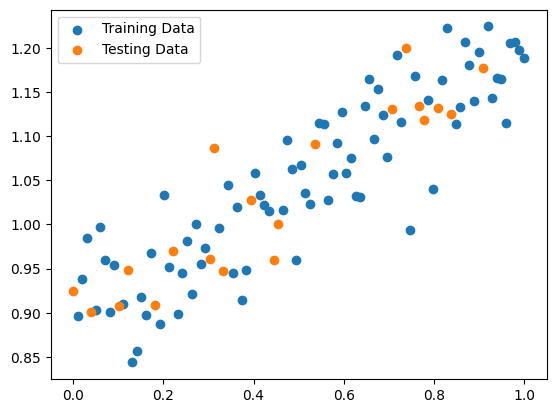

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
np.random.seed(42)

# Create dataset
X = np.linspace(0, 1, 100)
y = 0.3 * X + 0.9 + np.random.normal(0, 0.05, 100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')
plt.legend()
plt.show()


In [2]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weight = nn.Parameter(torch.rand(1, requires_grad=True))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True))

    def forward(self, x):
        return self.weight * x + self.bias

# Create an instance of the model
model = LinearRegressionModel()

# Check the state_dict
print(model.state_dict())


OrderedDict([('weight', tensor([0.8640])), ('bias', tensor([0.7886]))])


In [3]:
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

def train_model(model, X, y, criterion, optimizer, num_epochs=300):
    for epoch in range(1, num_epochs + 1):
        inputs = torch.Tensor(X).view(-1, 1)
        labels = torch.Tensor(y).view(-1, 1)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print the loss every 20 epochs
        if epoch % 20 == 0:
            print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')

# Train the model
train_model(model, X_train, y_train, criterion, optimizer)


Epoch 20/300, Loss: 0.12798316776752472
Epoch 40/300, Loss: 0.1073949933052063
Epoch 60/300, Loss: 0.09842252731323242
Epoch 80/300, Loss: 0.09062884002923965
Epoch 100/300, Loss: 0.08288799226284027
Epoch 120/300, Loss: 0.07535188645124435
Epoch 140/300, Loss: 0.06830713897943497
Epoch 160/300, Loss: 0.061514515429735184
Epoch 180/300, Loss: 0.056109748780727386
Epoch 200/300, Loss: 0.05194336920976639
Epoch 220/300, Loss: 0.04886423796415329
Epoch 240/300, Loss: 0.045813560485839844
Epoch 260/300, Loss: 0.043228406459093094
Epoch 280/300, Loss: 0.04122269153594971
Epoch 300/300, Loss: 0.0396081767976284


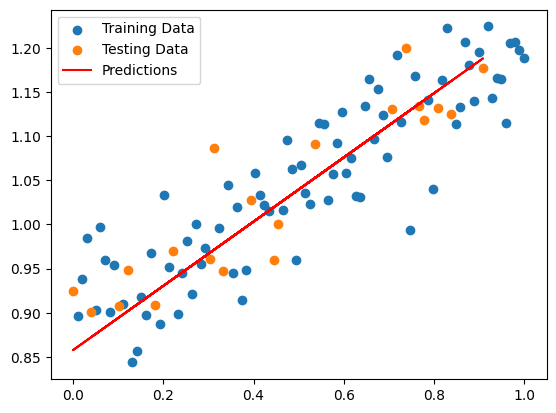

In [4]:
# Convert the test data to a PyTorch tensor
X_test_tensor = torch.Tensor(X_test).view(-1, 1)

# Make predictions
predictions = model(X_test_tensor).detach().numpy()

# Visualize predictions against the original data
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')
plt.plot(X_test, predictions, label='Predictions', color='red')
plt.legend()
plt.show()


In [5]:
# Save the model's state_dict to a file
torch.save(model.state_dict(), 'linear_regression_model.pth')

# Create a new instance of the model and load the state_dict
new_model = LinearRegressionModel()
new_model.load_state_dict(torch.load('linear_regression_model.pth'))

# Make predictions with the loaded model
loaded_predictions = new_model(X_test_tensor).detach().numpy()

# Confirm that predictions match
print(np.allclose(predictions, loaded_predictions))


True
